# 1. Do a complete EDA on Loan Defaulter data
# State whatever insights you are getting from the graphs you have plotted
# And keep that notebook uploaded on kaggle
# https://www.kaggle.com/datasets/gauravduttakiit/loan-defaulter

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [4]:
df=pd.read_csv('application_data.csv') 
col_desc=pd.read_csv('columns_description.csv')

In [5]:
col_desc.shape

(160, 5)

In [6]:
df.size

37516342

In [7]:
df.shape

(307511, 122)

In [8]:
col_desc.size

800

In [9]:
df.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 122, dtype: object

In [10]:
col_desc.dtypes

Unnamed: 0      int64
Table          object
Row            object
Description    object
Special        object
dtype: object

In [11]:
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
col_desc

,Unnamed: 0,Table,Row,Description,Special
0,1,application_data,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_data,TARGET,Target variable (1 - client with payment diffi...,NaN
2,5,application_data,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_data,CODE_GENDER,Gender of the client,NaN
4,7,application_data,FLAG_OWN_CAR,Flag if the client owns a car,NaN
...,...,...,...,...,...
155,209,previous_application.csv,DAYS_FIRST_DUE,Relative to application date of current applic...,time only relative to the application
156,210,previous_application.csv,DAYS_LAST_DUE_1ST_VERSION,Relative to application date of current applic...,time only relative to the application
157,211,previous_application.csv,DAYS_LAST_DUE,Relative to application date of current applic...,time only relative to the application
158,212,previous_application.csv,DAYS_TERMINATION,Relative to application date of current applic...,time only relative to the application


In [14]:
df.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [18]:
df['AMT_INCOME_TOTAL'].describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [19]:
q3=np.percentile(df['AMT_INCOME_TOTAL'],75)
q1=np.percentile(df['AMT_INCOME_TOTAL'],25)
q3,q1 

(202500.0, 112500.0)

In [20]:
iqr=q3-q1
iqr

90000.0

In [22]:
ub=q3+(1.5*iqr)
lb=q1-(1.5*iqr)
ub,lb

(337500.0, -22500.0)

In [23]:
df=df[(df['AMT_INCOME_TOTAL']<=ub) & (df['AMT_INCOME_TOTAL']>=lb)]

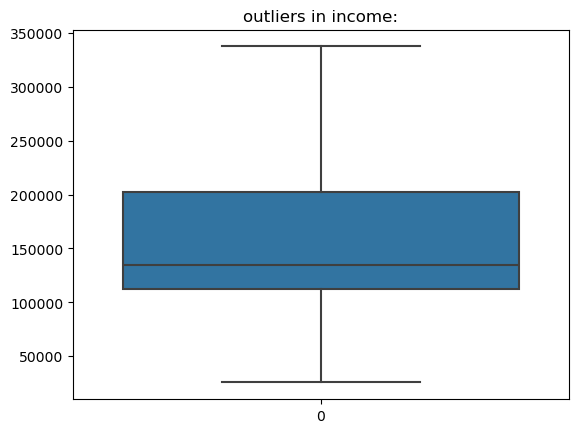

In [24]:
sns.boxplot(df['AMT_INCOME_TOTAL']);
plt.title('outliers in income:');

In [38]:
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,293476.000000,293476.000000,293476.000000,293476.000000,2.934760e+05,293464.000000,2.932040e+05,293476.000000,293476.000000,293476.000000,...,293476.000000,293476.000000,293476.000000,293476.000000,253280.000000,253280.000000,253280.000000,253280.000000,253280.000000,253280.000000
mean,278188.094710,0.081809,0.414139,154263.935956,5.797509e+05,26254.699461,5.200857e+05,0.020430,-16049.902353,65613.276765,...,0.007963,0.000576,0.000508,0.000341,0.006424,0.007020,0.034385,0.260546,0.264616,1.901575
std,102782.717187,0.274074,0.720161,64014.949755,3.844930e+05,13420.472584,3.513777e+05,0.013169,4396.485009,142741.972403,...,0.088881,0.023990,0.022527,0.018456,0.083939,0.110695,0.205130,0.896346,0.612783,1.868779
min,100002.000000,0.000000,0.000000,25650.000000,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25201.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189137.750000,0.000000,0.000000,112500.000000,2.700000e+05,16231.500000,2.340000e+05,0.010006,-19743.000000,-2729.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278229.500000,0.000000,0.000000,135000.000000,4.995000e+05,24399.000000,4.500000e+05,0.018850,-15764.000000,-1189.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367074.500000,0.000000,1.000000,202500.000000,7.908300e+05,33363.000000,6.750000e+05,0.026392,-12380.000000,-270.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,337500.000000,3.860019e+06,225000.000000,3.555000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,24.000000,19.000000,25.000000


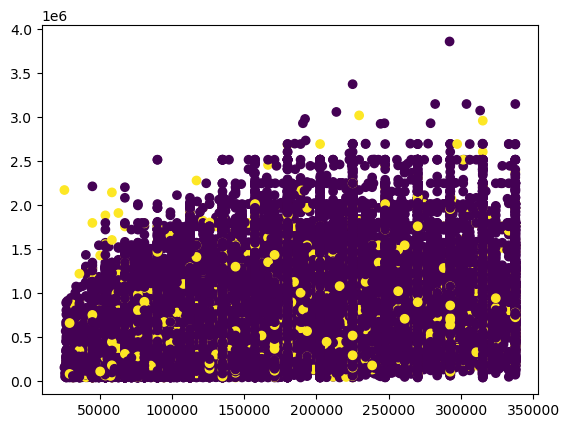

In [36]:
plt.scatter(df['AMT_INCOME_TOTAL'],df['AMT_CREDIT'],c=df['TARGET']);

# 2. EDA on Academic Success Dataset
# State whatever insights you are getting from the graphs you have plotted
# https://www.kaggle.com/datasets/ravi20076/playgrounds4e06originaldata?select=original.csv

In [88]:
df=pd.read_csv('original.csv')

In [89]:
df.describe()

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,2212.500000,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,1277.243125,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1106.750000,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,2212.500000,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,3318.250000,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,4424.000000,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [91]:
df.shape

(4424, 38)

In [92]:
df.isnull().sum()

id                                                0
Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship 

In [95]:
df.dtypes

id                                                  int64
Marital status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance\t                        int64
Previous qualification                              int64
Previous qualification (grade)                    float64
Nacionality                                         int64
Mother's qualification                              int64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Admission grade                                   float64
Displaced                                           int64
Educational special needs                           int64
Debtor                                              int64
Tuition fees u

In [96]:
df

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,1,17,5,171,1,1,122.0,1,19,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,2,1,15,1,9254,1,1,160.0,1,1,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,3,1,1,5,9070,1,1,122.0,1,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,4,1,17,2,9773,1,1,122.0,1,38,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,5,2,39,1,8014,0,1,100.0,1,37,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,4420,1,1,6,9773,1,1,125.0,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,4421,1,1,2,9773,1,1,120.0,105,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,4422,1,1,1,9500,1,1,154.0,1,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,4423,1,1,1,9147,1,1,180.0,1,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


In [98]:
q3=np.percentile(df['GDP'],75)
q1=np.percentile(df['GDP'],25)
q3,q1 

(1.79, -1.7)

In [99]:
iqr=q3-q1
iqr

3.49

In [100]:
ub=q3+(1.5*iqr)
lb=q1-(1.5*iqr)
ub,lb

(7.025, -6.9350000000000005)

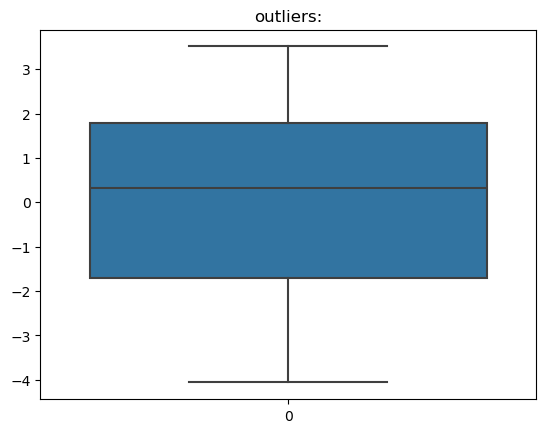

In [101]:
sns.boxplot(df['GDP']);
plt.title('outliers:');

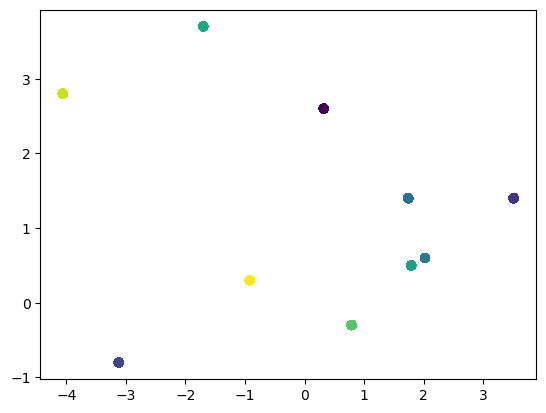

In [104]:
plt.scatter(df['GDP'],df['Inflation rate'],c=df['Unemployment rate']);

# 3. Do an EDA on any dataset
# State whatever insights you are getting from the graphs you have plotted

In [45]:
df=pd.read_csv('used_cars_data.csv') 

In [46]:
df

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN


In [48]:
# Display the first few rows
print(df.head())

   S.No.                              Name    Location  Year  \
0      0            Maruti Wagon R LXI CNG      Mumbai  2010   
1      1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015   
2      2                      Honda Jazz V     Chennai  2011   
3      3                 Maruti Ertiga VDI     Chennai  2012   
4      4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013   

   Kilometers_Driven Fuel_Type Transmission Owner_Type     Mileage   Engine  \
0              72000       CNG       Manual      First  26.6 km/kg   998 CC   
1              41000    Diesel       Manual      First  19.67 kmpl  1582 CC   
2              46000    Petrol       Manual      First   18.2 kmpl  1199 CC   
3              87000    Diesel       Manual      First  20.77 kmpl  1248 CC   
4              40670    Diesel    Automatic     Second   15.2 kmpl  1968 CC   

       Power  Seats  New_Price  Price  
0  58.16 bhp    5.0        NaN   1.75  
1  126.2 bhp    5.0        NaN  12.50  
2   88.7 bhp    5.0 

In [49]:
# Display the dataset's shape
print(df.shape)

(7253, 14)


In [50]:
# Get summary statistics
print(df.describe())

             S.No.         Year  Kilometers_Driven        Seats        Price
count  7253.000000  7253.000000       7.253000e+03  7200.000000  6019.000000
mean   3626.000000  2013.365366       5.869906e+04     5.279722     9.479468
std    2093.905084     3.254421       8.442772e+04     0.811660    11.187917
min       0.000000  1996.000000       1.710000e+02     0.000000     0.440000
25%    1813.000000  2011.000000       3.400000e+04     5.000000     3.500000
50%    3626.000000  2014.000000       5.341600e+04     5.000000     5.640000
75%    5439.000000  2016.000000       7.300000e+04     5.000000     9.950000
max    7252.000000  2019.000000       6.500000e+06    10.000000   160.000000


In [51]:
# Check for missing values
print(df.isnull().sum())

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                  46
Seats                  53
New_Price            6247
Price                1234
dtype: int64


In [52]:
df.dtypes

S.No.                  int64
Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
New_Price             object
Price                float64
dtype: object

In [53]:
df['Year'].describe()

count    7253.000000
mean     2013.365366
std         3.254421
min      1996.000000
25%      2011.000000
50%      2014.000000
75%      2016.000000
max      2019.000000
Name: Year, dtype: float64

In [54]:
q3=np.percentile(df['Year'],75)
q1=np.percentile(df['Year'],25)
q3,q1 

(2016.0, 2011.0)

In [55]:
iqr=q3-q1
iqr

5.0

In [56]:
ub=q3+(1.5*iqr)
lb=q1-(1.5*iqr)
ub,lb

(2023.5, 2003.5)

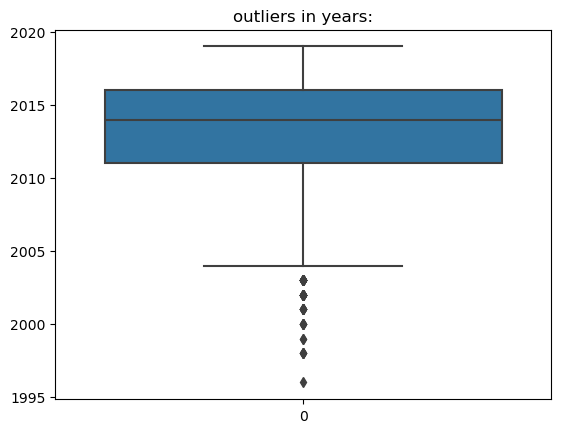

In [58]:
sns.boxplot(df['Year']);
plt.title('outliers in years:');

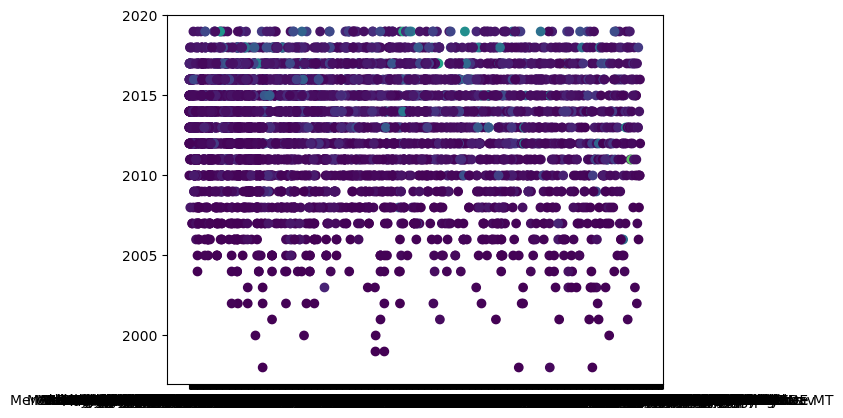

In [78]:
plt.scatter(df['Name'],df['Year'],c=df['Price']); 

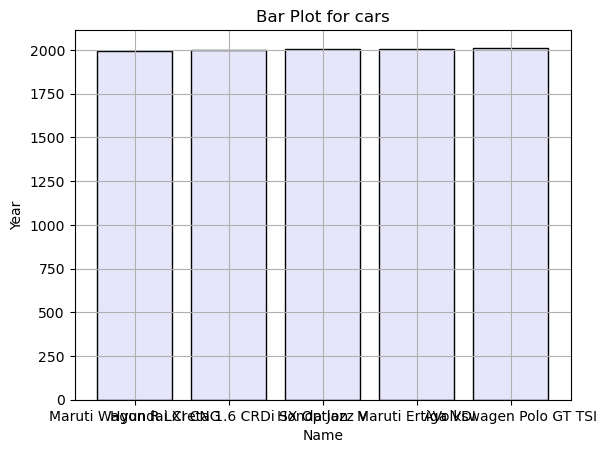

In [87]:
Name=['Maruti Wagon R LXI CNG', 'Hyundai Creta 1.6 CRDi SX Option','Honda Jazz V',
       'Maruti Ertiga VDI','AVolkswagen Polo GT TSI']
Year=[1996,2000,2004,2008,2013]
plt.title('Bar Plot for cars')
plt.xlabel('Name')
plt.ylabel('Year')
plt.bar(Name,Year,color='lavender',edgecolor='black');
plt.grid()